# Chapter 4:  Speech/voice Recognition 

# Use Case 2:  voice-controlled home access

# Model: MobileNet V1 (CNN)

# Step 1: Data Collection (downloading)

In [1]:

## Import the required modules

import urllib
from bs4 import BeautifulSoup
from selenium import webdriver
import os, os.path
import simplejson

from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC

## Create links book for the audio data to be downloaded: this may include repeated readers

book_links = []

browser = webdriver.PhantomJS(executable_path = '/usr/local/bin/phantomjs')


for i in range(1): ## testing first 0-1 (2) pages of the site : to minimise the time require to downloads
    
    url = ("https://librivox.org/search?title=&author=&reader=&keywords=&genre_id=0&status=all&project_type=solo&recorded_language=&sort_order=catalog_date&search_page={}&search_form=advanced").format(i)
    
    print(url)
    
    browser.get(url)
    element = WebDriverWait(browser, 100).until(
    EC.presence_of_element_located((By.CLASS_NAME , "catalog-result")))
    html = browser.page_source
    soup = BeautifulSoup(html, 'html.parser')
    
    ul_tag = soup.find('ul', {'class': 'browse-list'})
    
    for li_tag in ul_tag.find_all('li', {'class': 'catalog-result'}):
        result_data = li_tag.find('div', {'class': 'result-data'})
        book_meta = result_data.find('p', {'class': 'book-meta'})
        link = result_data.a["href"]
        print(link)
        if str(book_meta).find("Complete") and link not in book_links:
            book_links.append(link)
            
    print(len(book_links)) # links per page could be different from regular browsers
    
browser.quit()

## save the gathered or scrapped links to a folder (audio_book_links_speakers.txt)

f = open('audio_book_links_speakers.txt', 'w')
simplejson.dump(book_links, f)
f.close()


## Extract the potential reader or speaker list

browser = webdriver.PhantomJS(executable_path = '/usr/local/bin/phantomjs')

reader_list = []
download_links = []
download_sizes = []

repreader = 0

for i in range(len(book_links)):
    
    link = book_links[i]
    
    browser.get(link)
    html = browser.page_source
    soup = BeautifulSoup(html, 'html.parser')
    
    product_details = soup.find('dl', {'class': 'product-details clearfix'})
    
    if product_details == None:
        continue
    
    product_details_list = product_details.find_all("dd")
    
    reader = product_details_list[3].get_text()
    size_mb = product_details_list[1].get_text()
    
    try:
        size_mb = float(size_mb.replace('MB',''))
    except:
        continue
    
    if reader not in reader_list:
            
        reader_list.append(reader)
        download_sizes.append(size_mb)

        listen_download = soup.find('dl', {'class': 'listen-download clearfix'})
        zip_download = listen_download.a["href"]

        print(reader, str(len(reader_list)) + "/" + str(i+1) + " potentials")

        download_links.append(zip_download)
            
    else:
        repreader += 1
        print("repeat reader " + str(repreader))
            
        
browser.quit()

### The downloads the for non repeatable readers/speakers

#  List of Links or pages for the audio books to be downloaded
f = open('audiodownload_links.txt', 'w')
simplejson.dump(download_links, f)
f.close()

## Record the file size of each reader's file

f = open('audiodownload_sizes.txt', 'w')
simplejson.dump(download_sizes, f)
f.close()


#### Download the files 
#
#
def count_files():
    dir = 'audio_files_downloaded'
    list = [file for file in os.listdir(dir) if file.endswith('.zip')] # dir is your directory path
    number_files = len(list)
    return number_files
#
counter = 10 # this is to use for nameing the individual downloaded file
#
###
#    
for link, size in zip(download_links, download_sizes):
    if size >= 50 and size <= 100:
        localDestination = 'audio_files_downloaded/audio{}.zip'.format(counter)
        resultFilePath, responseHeaders = urllib.request.urlretrieve(link, localDestination)
        counter += 1
#
cnt2 =  0
num = count_files()

if num < 200:
    for link, size in zip(download_links, download_sizes):
        if size > 100 and size <= 150:
            localDestination = 'audio_files_downloaded/audio{}.zip'.format(counter)
            resultFilePath, responseHeaders = urllib.request.urlretrieve(link, localDestination)
            counter += 1
        cnt2 += 1

num = count_files()

if num < 200:
    for link, size in zip(download_links, download_sizes):
        if size > 150 and size <= 200:
            localDestination = 'audio_files_downloaded/audio{}.zip'.format(counter)
            resultFilePath, responseHeaders = urllib.request.urlretrieve(link, localDestination)
            counter += 1
        
num = count_files()

if num < 200:
    for link, size in zip(download_links, download_sizes):
        if size > 200 and size <= 250:
            localDestination = 'audio_files_downloaded/audio{}.zip'.format(counter)
            resultFilePath, responseHeaders = urllib.request.urlretrieve(link, localDestination)
            counter += 1
        
num = count_files()

if num < 200:
    for link, size in zip(download_links, download_sizes):
        if size > 250 and size <= 300:
            localDestination = 'audio_files_downloaded/audio{}.zip'.format(counter)
            resultFilePath, responseHeaders = urllib.request.urlretrieve(link, localDestination)
            counter += 1
            
num = count_files()

if num < 200:
    for link, size in zip(download_links, download_sizes):
        if size > 300 and size <= 350:
            localDestination = 'audio_files_downloaded/audio{}.zip'.format(counter)
            resultFilePath, responseHeaders = urllib.request.urlretrieve(link, localDestination)
            counter += 1
            
num = count_files()

if num < 200:
    for link, size in zip(download_links, download_sizes):
        if size > 350 and size <= 400:
            localDestination = 'audio_files_downloaded/audio{}.zip'.format(counter)
            resultFilePath, responseHeaders = urllib.request.urlretrieve(link, localDestination)
            counter += 1           


/Users/raz/anaconda3/lib/python3.7/site-packages/selenium/webdriver/phantomjs/webdriver.py:49: UserWarning: Selenium support for PhantomJS has been deprecated, please use headless versions of Chrome or Firefox instead
  warnings.warn('Selenium support for PhantomJS has been deprecated, please use headless '


https://librivox.org/search?title=&author=&reader=&keywords=&genre_id=0&status=all&project_type=solo&recorded_language=&sort_order=catalog_date&search_page=0&search_form=advanced
https://librivox.org/eclesiastes-by-reina-valera/
https://librivox.org/the-corner-house-by-fred-m-white/
https://librivox.org/the-life-and-adventures-of-chanticleer-the-intelligent-rooster-an-interesting-story-in-verse-for-children-by-unknown/
https://librivox.org/esdras-by-reina-valera/
https://librivox.org/london-labour-and-the-london-poor-volume-ii-by-henry-mayhew/
https://librivox.org/stories-of-the-scottish-border-by-william-platt/
https://librivox.org/the-range-dwellers-by-b-m-bower/
https://librivox.org/the-golden-slave-by-poul-william-anderson/
https://librivox.org/that-unfortunate-marriage-by-frances-eleanor-trollope/
https://librivox.org/animals-of-the-past-by-frederic-lucas/
https://librivox.org/how-to-tell-a-story-and-other-essays-by-mark-twain-2/
https://librivox.org/baled-hay-a-drier-book-than-wa

KeyboardInterrupt: 

# Step 2: Data/Image Exploration 
Once, we are with occupant (we tested for 3 & 5) wise image dataset, lets have a look at the image data.

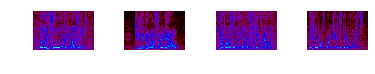

In [2]:
# Five classes (manhole, pavement, pothole, roadmarkings, shadow)
# Import the necessary modules

import cv2
import glob
import numpy as np
import os
import random
import matplotlib.pyplot as plt

# List to store the images of each class

images =[]


# This is to show plot 
%matplotlib inline

# Function to read image file one by one and append to the images list

def data_explorer(image_dir, images_to_explore):  
        
    image_files =os.path.join(image_dir, "*.jpg") 
    files = glob.glob (image_files) 
        
    for myFile in files:
        image = cv2.imread (myFile)
        images.append (image)

    data = np.array(images) 
    
 
 # random indexes for the images to be explored
 
    r =len(data)
    #print (r)
    my_randoms = random.sample(range(r), images_to_explore)
    # list of random indexes 
    data_toexplore = my_randoms

    # Plot the images to explore 

    for i in range(len(data_toexplore)):
        plt.subplot(1, 4, i+1)
        plt.axis('off')
        #print(i)
        plt.imshow(data[data_toexplore[i]])
        plt.subplots_adjust(wspace=0.5)

    plt.show()
    
DATASET_PATH = "dataset/Occupant1"  

#Call the function with 4 random images to be explored

data_explorer(DATASET_PATH, 4)
   

# Step 3: Pre-processing

# Step 4: Model Training and Validation

In [ ]:
Download the mobilenet_1.0_224 model from https://github.com/tensorflow/models/blob/master/research/slim/nets/mobilenet_v1.
md, and save it into a dirctory that will be your model directory in the following code (we used Mobilenet)

In [3]:


import os
import argparse
import tensorflow as tf
from IPython.display import Image

import retrain  # Available in the usecase 2 folder

In [4]:
# Have a look at the default values
# For the meaning of these values look at retrain_CNN.py:

FLAGS = argparse.Namespace()
FLAGS.image_dir = ""
FLAGS.output_graph = '.\\retrained_graph.pb'
FLAGS.output_labels = '.\\output_labels.txt'
FLAGS.summaries_dir = '.\\summaries'
FLAGS.how_many_training_steps = 4000
FLAGS.learning_rate = 0.01
FLAGS.testing_percentage = 10
FLAGS.validation_percentage = 10
FLAGS.eval_step_interval = 10
FLAGS.train_batch_size = 100
FLAGS.test_batch_size = -1
FLAGS.validation_batch_size = 100
FLAGS.intermediate_store_frequency =10
FLAGS.print_misclassified_test_images = False
FLAGS.model_dir = "."
FLAGS.bottleneck_dir = "bottlenecks"
FLAGS.final_tensor_name = "final_result"
FLAGS.flip_left_right = False
FLAGS.random_crop = 0
FLAGS.random_scale = 0
FLAGS.random_brightness = 0
FLAGS.intermediate_output_graphs_dir ="."
FLAGS.architecture = "mobilenet_1.0_224" # for Incentive- inception_v3

In [5]:
# change default: 
FLAGS.how_many_training_steps = 1000
FLAGS.model_dir = "Mobilenet" # for Incentive make it inactive or show the path for the downloaded model
FLAGS.output_graph = "retrained_mobilenet_graph.pb"  
FLAGS.output_labels = "retrained_labels.txt"
FLAGS.image_dir = "dataset" # For the modified dataset use the modified dataset directory 


In [6]:
retrain.FLAGS = FLAGS
tf.app.run(main=retrain.main)

Instructions for updating:
Use tf.gfile.GFile.
INFO:tensorflow:Looking for images in 'Occupant1'
INFO:tensorflow:Looking for images in 'Occupant3'
INFO:tensorflow:Looking for images in 'Occupant2'
INFO:tensorflow:Creating bottleneck at bottlenecks/Occupant1/6345-93302-0027.jpg_mobilenet_1.0_224.txt
INFO:tensorflow:Creating bottleneck at bottlenecks/Occupant1/6345-64257-0002.jpg_mobilenet_1.0_224.txt
INFO:tensorflow:Creating bottleneck at bottlenecks/Occupant1/6345-64257-0016.jpg_mobilenet_1.0_224.txt
INFO:tensorflow:Creating bottleneck at bottlenecks/Occupant1/6345-93306-0011.jpg_mobilenet_1.0_224.txt
INFO:tensorflow:Creating bottleneck at bottlenecks/Occupant1/6345-93306-0010.jpg_mobilenet_1.0_224.txt
INFO:tensorflow:Creating bottleneck at bottlenecks/Occupant1/6345-64257-0017.jpg_mobilenet_1.0_224.txt
INFO:tensorflow:Creating bottleneck at bottlenecks/Occupant1/6345-93302-0018.jpg_mobilenet_1.0_224.txt
INFO:tensorflow:Creating bottleneck at bottlenecks/Occupant1/6345-64257-0001.jpg_m

KeyboardInterrupt: 

# Step 5: Test model on new picture individual Acne Images in Raspberry Pi or Other Devices.

In [2]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function


import numpy as np
import tensorflow as tf
# Function to load a pretrained model (transfer learning)

def load_graph(model_file):
  graph = tf.Graph()
  graph_def = tf.GraphDef()

  with open(model_file, "rb") as f:
    graph_def.ParseFromString(f.read())
  with graph.as_default():
    tf.import_graph_def(graph_def)

  return graph

# Function for image to tensor conversion

def read_tensor_from_image_file(file_name,
                                input_height=299,
                                input_width=299,
                                input_mean=0,
                                input_std=255):
  input_name = "file_reader"
  #output_name = "normalized"
  file_reader = tf.read_file(file_name, input_name)
  if file_name.endswith(".png"):
    image_reader = tf.image.decode_png(
        file_reader, channels=3, name="png_reader")
  elif file_name.endswith(".gif"):
    image_reader = tf.squeeze(
        tf.image.decode_gif(file_reader, name="gif_reader"))
  elif file_name.endswith(".bmp"):
    image_reader = tf.image.decode_bmp(file_reader, name="bmp_reader")
  else:
    image_reader = tf.image.decode_jpeg(
        file_reader, channels=3, name="jpeg_reader")
  float_caster = tf.cast(image_reader, tf.float32)
  dims_expander = tf.expand_dims(float_caster, 0)
  resized = tf.image.resize_bilinear(dims_expander, [input_height, input_width])
  normalized = tf.divide(tf.subtract(resized, [input_mean]), [input_std])
  sess = tf.Session()
  result = sess.run(normalized)

  return result

# Function for loading label files

def load_labels(label_file):
  label = []
  proto_as_ascii_lines = tf.gfile.GFile(label_file).readlines()
  for l in proto_as_ascii_lines:
    label.append(l.rstrip())
  return label


In [3]:
# Provide input to be predicted with model file and label or class file 
file_name = "test_images/occupant1-2.jpg"
model_file = "retrained_mobilenet_graph.pb"
label_file = "retrained_labels.txt"

# Fixed input for Mobilenet V1
input_height = 224
input_width = 224
input_mean = 0
input_std = 255
input_layer = "input"
output_layer = "final_result"

# Load the model
graph = load_graph(model_file)
t = read_tensor_from_image_file(
      file_name,
      input_height=input_height,
      input_width=input_width,
      input_mean=input_mean,
      input_std=input_std)

input_name = "import/" + input_layer
output_name = "import/" + output_layer
input_operation = graph.get_operation_by_name(input_name)
output_operation = graph.get_operation_by_name(output_name)

with tf.Session(graph=graph) as sess:
    results = sess.run(output_operation.outputs[0], {
        input_operation.outputs[0]: t
    })

results = np.squeeze(results)

top_k = results.argsort()[-5:][::-1]
labels = load_labels(label_file)
for i in top_k:
    print("Pontenially", labels[i], "with confidence level",results[i])

Pontenially occupant1 with confidence level 0.9993687
Pontenially occupant2 with confidence level 0.0006305257
Pontenially occupant3 with confidence level 7.465812e-07
